# Import relevant libraries and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
purchaseData = pd.read_csv("G:\\virtual experience\\Quantium\\QVI_purchase_behaviour.csv")
transactionData = pd.read_excel("G:\\virtual experience\\Quantium\\QVI_transaction_data.xlsx")

In [4]:
purchaseData.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [5]:
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


# Data Cleaning and Feature Extraction

The date is not in correct format. Formatting the date as below:

In [6]:
from datetime import date, timedelta
start = date(1899,12,30)

new_date_format = []

for date in transactionData["DATE"]:
    delta = timedelta(date)
    new_date_format.append(start + delta)

transactionData["DATE"] = pd.to_datetime(pd.Series(new_date_format))

In [7]:
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [8]:
# Extract weights out of 'PROD_NAME'

transactionData['PACK_SIZE'] = transactionData['PROD_NAME'].str.extract("(\d+)")
transactionData['PACK_SIZE'] = pd.to_numeric(transactionData['PACK_SIZE'])
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [12]:
split_prod = transactionData["PROD_NAME"].str.replace(r'([0-9]+[gG])','').str.replace(r'[^\w]', ' ').str.split()

word_counts = {}

def count_words(line):
    for word in line:
        if word not in word_counts:
            word_counts[word] = 1
        else:
            word_counts[word] += 1
            
split_prod.apply(lambda line: count_words(line))

print(pd.Series(word_counts).sort_values(ascending=False))

Chips      49770
Kettle     41288
Smiths     28860
Salt       27976
Cheese     27890
           ...  
Whlegrn     1432
Pc          1431
NCC         1419
Garden      1419
Fries       1418
Length: 198, dtype: int64


In [13]:
transactionData = transactionData[~transactionData["PROD_NAME"].str.contains(r"[Ss]alsa")]
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


# Exploratory Data Analysis

In [14]:
# Value counts of PROD_QTY

transactionData['PROD_QTY'].value_counts()

2      220070
1       25476
5         415
3         408
4         371
200         2
Name: PROD_QTY, dtype: int64

In [15]:
transactionData.loc[transactionData['PROD_QTY'] == 200, :]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380


In [16]:
transactionData.loc[transactionData['LYLTY_CARD_NBR'] == 226000, :]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380


Same person has made two similar transactions over a year. Since this person is not a frequent buyer, it is safe to assume that they do not contribute much towards the analysis, and hence, can be dropped.

In [19]:
transactionData.drop(transactionData.index[transactionData['LYLTY_CARD_NBR'] == 226000], inplace = True)
purchaseData.drop(purchaseData.index[purchaseData['LYLTY_CARD_NBR'] == 226000], inplace = True)

In [20]:
transactionData["DATE"].describe()

count                  246740
unique                    364
top       2018-12-24 00:00:00
freq                      865
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

Since the data is for 1 year, we have only 364 values intead of 365. Let's examine the missing date

In [22]:
pd.date_range(start=transactionData["DATE"].min(), end=transactionData["DATE"].max()).difference(transactionData["DATE"])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

As is clear, the day of Christmas, 25 December is the day the sales data is null. Lets plot it for better understanding.

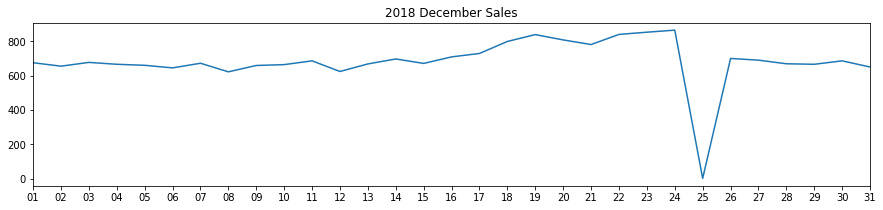

In [21]:
missing_date = pd.merge(pd.Series(pd.date_range(start=transactionData["DATE"].min(), end=transactionData["DATE"].max()), name="DATE"), transactionData, on="DATE", how="left")

trans_by_date = missing_date["DATE"].value_counts()
dec = trans_by_date[(trans_by_date.index >= pd.datetime(2018,12,1)) & (trans_by_date.index < pd.datetime(2019,1,1))].sort_index()
dec.index = dec.index.strftime('%d')
ax = dec.plot(figsize=(15,3))
ax.set_xticks(np.arange(len(dec)))
ax.set_xticklabels(dec.index)
plt.title("2018 December Sales")
plt.savefig("2018 December Sales.png", bbox_inches="tight")
plt.show()



Exploring total sales, and identifying the period of highest and lowest sales

In [25]:
#create a seperate dataframe, instead of taking entire table.
sales_df = pd.pivot_table(transactionData, values = 'TOT_SALES', index = 'DATE', aggfunc = 'sum')

date_df = pd.DataFrame(index = pd.date_range(start = '2018-07-01', end = '2019-06-30'))
date_df['TOT_SALES'] = 0

sales_period_df = sales_df + date_df
sales_period_df.fillna(0, inplace = True)
sales_period_df.index.name = 'Date'
sales_period_df.rename(columns = {'TOT_SALES': 'Total Sales'}, inplace = True)

sales_period_df.head()

,Total Sales
Date,
2018-07-01,4920.1
2018-07-02,4877.0
2018-07-03,4954.7
2018-07-04,4968.1
2018-07-05,4682.0


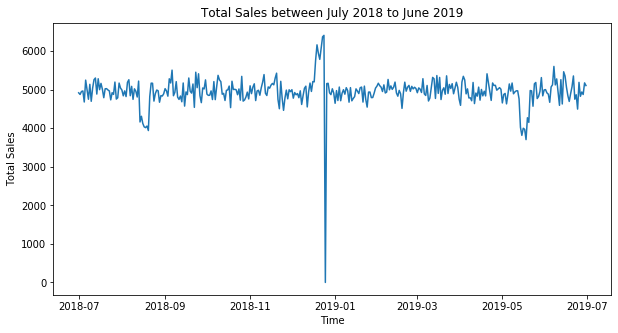

In [29]:
import datetime
from matplotlib.dates import DateFormatter

timeline = sales_period_df.index
graph = sales_period_df['Total Sales']

fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(timeline, graph)

date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
plt.title('Total Sales between July 2018 to June 2019')
plt.xlabel('Time')
plt.ylabel('Total Sales')

plt.show()

Sales were highest around Christmas, with the sharp drop signifying zero sales on Christmas, as the stores are closed. On other days, the sales were consistent.

Exploring Product Packet sizes

count    240676.000000
mean        175.302286
std          60.014468
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: 0, dtype: float64


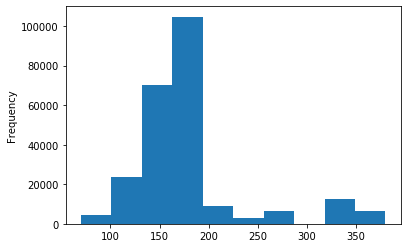

In [32]:
transactionData["PROD_NAME"] = transactionData["PROD_NAME"].str.replace(r'[0-9]+(G)','g')
pack_sizes = transactionData["PROD_NAME"].str.extract(r'([0-9]+[gG])')[0].str.replace("g","").astype("float")
print(pack_sizes.describe())
pack_sizes.plot.hist()

Largest pack size= 380g, Smallest size = 70 g. Highest selling size is between 170-180 g.

Checking highest selling brands

In [34]:
# Extracting brand name from PROD_NAME and create new column called BRAND_NAME

partition_df = transactionData['PROD_NAME'].str.partition()
transactionData['BRAND_NAME'] = partition_df[0]
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle


In [35]:
transactionData['BRAND_NAME'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [37]:
# Rename brand names for consistency

transactionData['BRAND_NAME'].replace('Ncc', 'Natural', inplace = True)
transactionData['BRAND_NAME'].replace('Ccs', 'CCS', inplace = True)
transactionData['BRAND_NAME'].replace('Smith', 'Smiths', inplace = True)
transactionData['BRAND_NAME'].replace(['Grain', 'Grnwves'], 'Grainwaves', inplace = True)
transactionData['BRAND_NAME'].replace('Dorito', 'Doritos', inplace = True)
transactionData['BRAND_NAME'].replace('Ww', 'Woolworths', inplace = True)
transactionData['BRAND_NAME'].replace('Infzns', 'Infuzions', inplace = True)
transactionData['BRAND_NAME'].replace(['Red', 'Rrd'], 'Red Rock Deli', inplace = True)
transactionData['BRAND_NAME'].replace('Snbts', 'Sunbites', inplace = True)


In [38]:
# Which brand had the most sales?

transactionData.groupby('BRAND_NAME').TOT_SALES.sum().sort_values(ascending = False)

BRAND_NAME
Kettle           390239.8
Doritos          226329.9
Smiths           217492.0
Pringles         177655.5
Infuzions         99047.6
Thins             88852.5
Twisties          81522.1
Tostitos          79789.6
Cobs              70569.8
RRD               64954.5
Tyrrells          51647.4
Grainwaves        43048.8
Cheezels          40029.9
WW                35889.5
Natural           34272.0
Red Rock Deli     22653.0
CCs               18078.9
Cheetos           16884.5
Sunbites           9676.4
GrnWves            8568.4
NCC                8046.0
French             7929.0
Burger             6831.0
Woolworths         5169.6
Name: TOT_SALES, dtype: float64

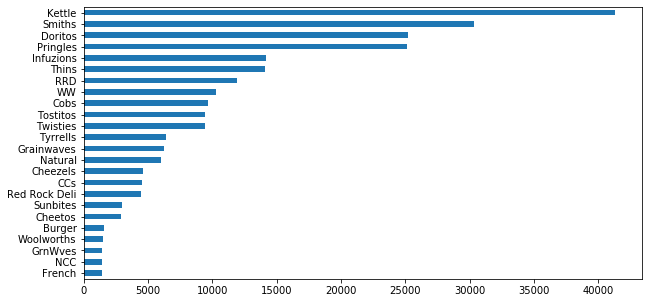

In [39]:
transactionData["BRAND_NAME"].value_counts(ascending=True).plot.barh(figsize=(10,5))

# Customer Data Analysis

In [41]:
purchaseData.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [43]:
print(purchaseData['LYLTY_CARD_NBR'].nunique())
print("----------------------------------------")
print(purchaseData['LIFESTAGE'].unique())
print("----------------------------------------")
print(purchaseData['PREMIUM_CUSTOMER'].unique())

72636
----------------------------------------
['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']
----------------------------------------
['Premium' 'Mainstream' 'Budget']


In [45]:
len(purchaseData)

72636

There exists equivalent number of unique loyalty cards, matching the total number of customers. Therefore, it is safe to assume that each customer has a unique card number.

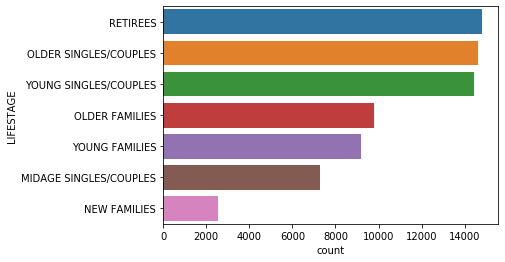

In [47]:
import seaborn as sns
sns.countplot(y = purchaseData['LIFESTAGE'], order = purchaseData['LIFESTAGE'].value_counts().index)

We have maximum purchase data by Retirees, followed by Older singles/couples and young singles/couples. Let's see the exact sales done by these domains. 
For that, we will merge the two dataset.

In [48]:
customerData = pd.merge(purchaseData, transactionData, on="LYLTY_CARD_NBR", how="right")
print(customerData.head())

   LYLTY_CARD_NBR              LIFESTAGE PREMIUM_CUSTOMER       DATE  \
0            1000  YOUNG SINGLES/COUPLES          Premium 2018-10-17   
1            1002  YOUNG SINGLES/COUPLES       Mainstream 2018-09-16   
2            1003         YOUNG FAMILIES           Budget 2019-03-07   
3            1003         YOUNG FAMILIES           Budget 2019-03-08   
4            1004  OLDER SINGLES/COUPLES       Mainstream 2018-11-02   

   STORE_NBR  TXN_ID  PROD_NBR                               PROD_NAME  \
0          1       1         5  Natural Chip        Compny SeaSalt175g   
1          1       2        58   Red Rock Deli Chikn&Garlic Aioli 150g   
2          1       3        52      Grain Waves Sour    Cream&Chives g   
3          1       4       106  Natural ChipCo      Hony Soy Chckn175g   
4          1       5        96          WW Original Stacked Chips 160g   

   PROD_QTY  TOT_SALES  PACK_SIZE     BRAND_NAME  
0         2        6.0        175        Natural  
1         1        2

In [49]:
grouped_sales = pd.DataFrame(customerData.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].agg(["sum"]))
grouped_sales.sort_values(ascending=False, by="sum")

sum
LIFESTAGE              PREMIUM_CUSTOMER           
OLDER FAMILIES         Budget            156863.75
YOUNG SINGLES/COUPLES  Mainstream        147582.20
RETIREES               Mainstream        145168.95
YOUNG FAMILIES         Budget            129717.95
OLDER SINGLES/COUPLES  Budget            127833.60
                       Mainstream        124648.50
                       Premium           123537.55
RETIREES               Budget            105916.30
OLDER FAMILIES         Mainstream         96413.55
RETIREES               Premium            91296.65
YOUNG FAMILIES         Mainstream         86338.25
MIDAGE SINGLES/COUPLES Mainstream         84734.25
YOUNG FAMILIES         Premium            78571.70
OLDER FAMILIES         Premium            75242.60
YOUNG SINGLES/COUPLES  Budget             57122.10
MIDAGE SINGLES/COUPLES Premium            54443.85
YOUNG SINGLES/COUPLES  Premium            39052.30
MIDAGE SINGLES/COUPLES Budget             33345.70
NEW FAMILIES           Budget             20607.45
                       Mainstream         15979.70
                       Premium            10760.80

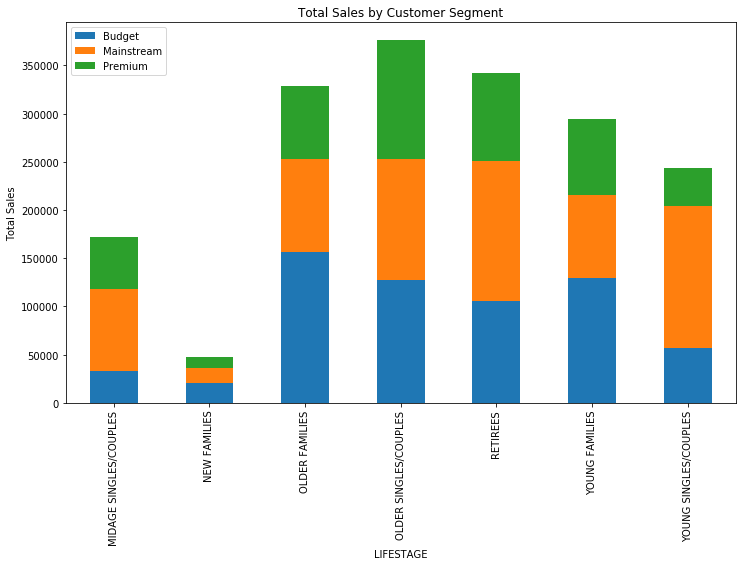

In [51]:
# Exploring sales across each segment in each lifestage

grouped_sales.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Total Sales by Customer Segment')
plt.ylabel('Total Sales')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

Top 3 sales come from budget older families, mainstream young singles/couples and mainstream retirees.

Exploring high frequency customer in each domain

In [52]:
customers = pd.DataFrame(customerData.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique())
customers.rename(columns = {'LYLTY_CARD_NBR': 'Number of Customers'}, inplace = True)
customers.sort_values(by = 'Number of Customers', ascending = False).head(10)

Number of Customers
PREMIUM_CUSTOMER LIFESTAGE                                 
Mainstream       YOUNG SINGLES/COUPLES                 7917
                 RETIREES                              6358
                 OLDER SINGLES/COUPLES                 4858
Budget           OLDER SINGLES/COUPLES                 4849
Premium          OLDER SINGLES/COUPLES                 4682
Budget           OLDER FAMILIES                        4611
                 RETIREES                              4385
                 YOUNG FAMILIES                        3953
Premium          RETIREES                              3812
Budget           YOUNG SINGLES/COUPLES                 3647

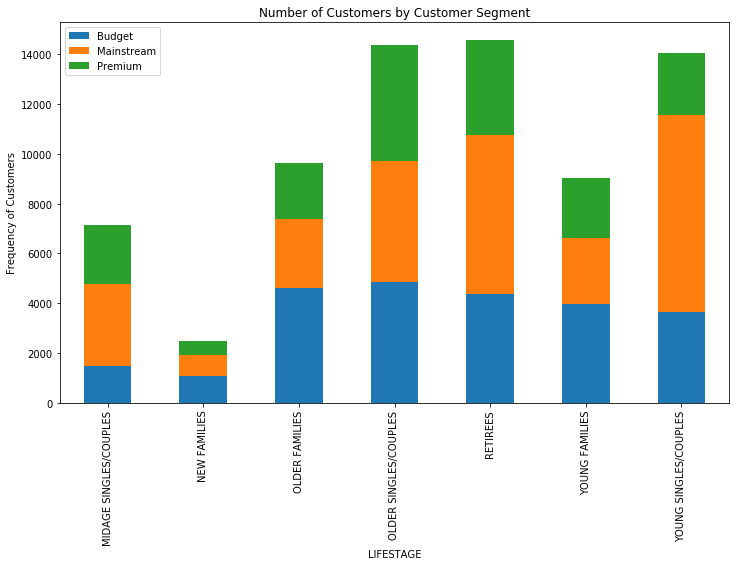

In [55]:
customers = pd.DataFrame(customerData.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
customers.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Number of Customers by Customer Segment')
plt.ylabel('Frequency of Customers')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

There are more mainstream young singles/couples and retirees. This contributes to to more chips sales in these segments however this is not the major driver for the budget older families segment.

Brand Preference

In [57]:
customerData.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["BRAND_NAME"].agg(pd.Series.mode).sort_values()

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              Kettle
YOUNG SINGLES/COUPLES   Budget              Kettle
YOUNG FAMILIES          Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
RETIREES                Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
OLDER SINGLES/COUPLES   Premium             Kettle
YOUNG SINGLES/COUPLES   Mainstream          Kettle
OLDER SINGLES/COUPLES   Mainstream          Kettle
OLDER FAMILIES          Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
NEW FAMILIES            Premium             Kettle
                        Mainstream          Kettle
                        Budget              Kettle
MIDAGE SINGLES/COUPLES  Premium             Kettle
                        Mainstream       

Exploring individual brand prefernce across esch customer segment

========== YOUNG SINGLES/COUPLES - Premium ==========
Kettle      838
Smiths      787
Pringles    537
Name: BRAND_NAME, dtype: int64


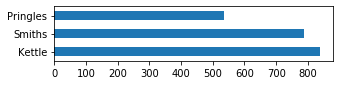

========== YOUNG SINGLES/COUPLES - Mainstream ==========
Kettle      3844
Doritos     2379
Pringles    2315
Name: BRAND_NAME, dtype: int64


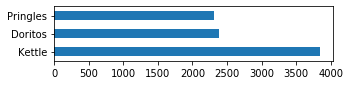

========== YOUNG SINGLES/COUPLES - Budget ==========
Kettle      1211
Smiths      1185
Pringles     832
Name: BRAND_NAME, dtype: int64


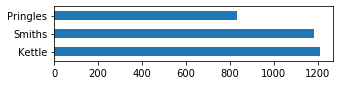

========== YOUNG FAMILIES - Premium ==========
Kettle      1745
Smiths      1384
Pringles    1007
Name: BRAND_NAME, dtype: int64


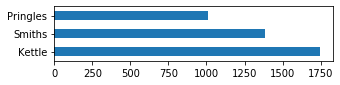

========== YOUNG FAMILIES - Mainstream ==========
Kettle      1789
Smiths      1681
Pringles    1148
Name: BRAND_NAME, dtype: int64


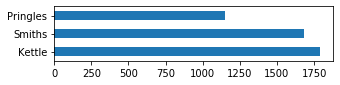

========== YOUNG FAMILIES - Budget ==========
Kettle     2743
Smiths     2334
Doritos    1767
Name: BRAND_NAME, dtype: int64


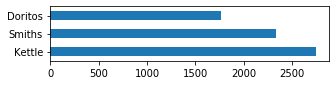

========== OLDER SINGLES/COUPLES - Premium ==========
Kettle     2947
Smiths     1952
Doritos    1784
Name: BRAND_NAME, dtype: int64


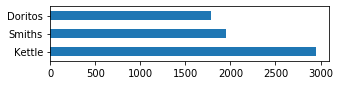

========== OLDER SINGLES/COUPLES - Mainstream ==========
Kettle     2835
Smiths     2070
Doritos    1791
Name: BRAND_NAME, dtype: int64


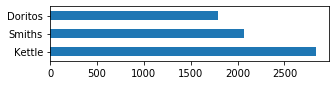

========== OLDER SINGLES/COUPLES - Budget ==========
Kettle      3065
Smiths      2010
Pringles    1843
Name: BRAND_NAME, dtype: int64


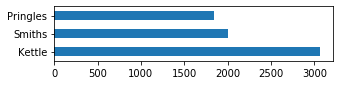

========== MIDAGE SINGLES/COUPLES - Premium ==========
Kettle      1206
Smiths       923
Pringles     781
Name: BRAND_NAME, dtype: int64


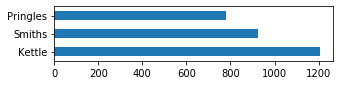

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
Kettle     2136
Smiths     1276
Doritos    1210
Name: BRAND_NAME, dtype: int64


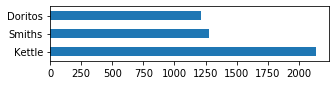

========== MIDAGE SINGLES/COUPLES - Budget ==========
Kettle     713
Smiths     591
Doritos    479
Name: BRAND_NAME, dtype: int64


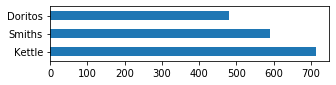

========== NEW FAMILIES - Premium ==========
Kettle      247
Pringles    165
Smiths      155
Name: BRAND_NAME, dtype: int64


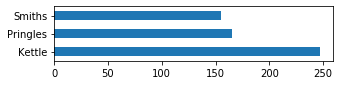

========== NEW FAMILIES - Mainstream ==========
Kettle     414
Doritos    257
Smiths     244
Name: BRAND_NAME, dtype: int64


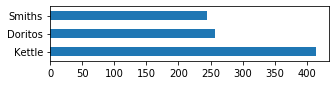

========== NEW FAMILIES - Budget ==========
Kettle     510
Smiths     328
Doritos    315
Name: BRAND_NAME, dtype: int64


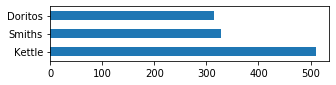

========== OLDER FAMILIES - Premium ==========
Kettle      1512
Smiths      1448
Pringles    1014
Name: BRAND_NAME, dtype: int64


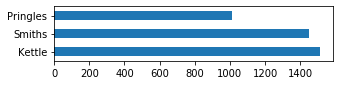

========== OLDER FAMILIES - Mainstream ==========
Kettle     2019
Smiths     1742
Doritos    1263
Name: BRAND_NAME, dtype: int64


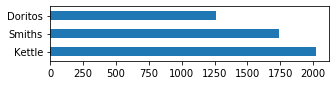

========== OLDER FAMILIES - Budget ==========
Kettle     3320
Smiths     2948
Doritos    2032
Name: BRAND_NAME, dtype: int64


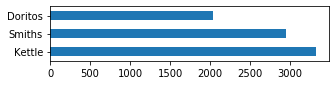

========== RETIREES - Premium ==========
Kettle      2216
Smiths      1395
Pringles    1331
Name: BRAND_NAME, dtype: int64


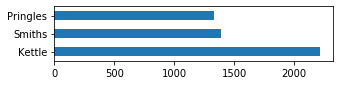

========== RETIREES - Mainstream ==========
Kettle      3386
Smiths      2367
Pringles    2103
Name: BRAND_NAME, dtype: int64


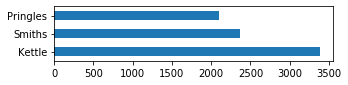

========== RETIREES - Budget ==========
Kettle     2592
Smiths     1612
Doritos    1592
Name: BRAND_NAME, dtype: int64


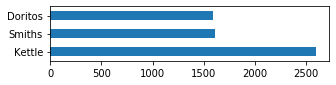

In [58]:
for stage in customerData["LIFESTAGE"].unique():
    for premium in customerData["PREMIUM_CUSTOMER"].unique():
        print('==========',stage, '-', premium,'==========')
        summary = customerData[(customerData["LIFESTAGE"] == stage) & (customerData["PREMIUM_CUSTOMER"] == premium)]["BRAND_NAME"].value_counts().head(3)
        print(summary)
        plt.figure()
        summary.plot.barh(figsize=(5,1))
        plt.show()

Every segment had Kettle as the most purchased brand. Every segment except "YOUNG SINGLES/COUPLES Mainstream" had Smiths as their second most purchased brand. "YOUNG SINGLES/COUPLES Mainstream" had Doritos as their second most purchased brand.

Exploring Pack size preference across each customer segment

========== YOUNG SINGLES/COUPLES - Premium ==========
134     537
150     933
175    1618
Name: PACK_SIZE, dtype: int64


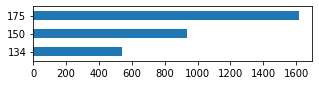

========== YOUNG SINGLES/COUPLES - Mainstream ==========
134    2315
150    3080
175    4997
Name: PACK_SIZE, dtype: int64


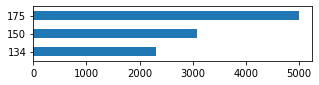

========== YOUNG SINGLES/COUPLES - Budget ==========
134     832
150    1390
175    2338
Name: PACK_SIZE, dtype: int64


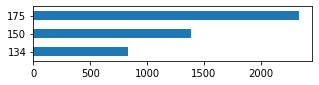

========== YOUNG FAMILIES - Premium ==========
134    1007
150    1778
175    2998
Name: PACK_SIZE, dtype: int64


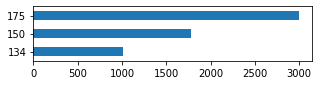

========== YOUNG FAMILIES - Mainstream ==========
134    1148
150    2004
175    3174
Name: PACK_SIZE, dtype: int64


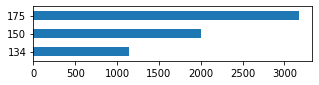

========== YOUNG FAMILIES - Budget ==========
134    1674
150    2862
175    4921
Name: PACK_SIZE, dtype: int64


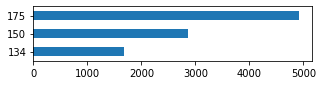

========== OLDER SINGLES/COUPLES - Premium ==========
134    1744
150    2768
175    4458
Name: PACK_SIZE, dtype: int64


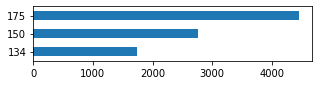

========== OLDER SINGLES/COUPLES - Mainstream ==========
134    1720
150    2773
175    4525
Name: PACK_SIZE, dtype: int64


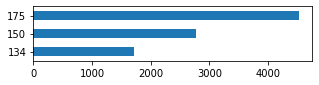

========== OLDER SINGLES/COUPLES - Budget ==========
134    1843
150    2811
175    4625
Name: PACK_SIZE, dtype: int64


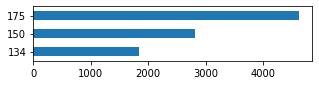

========== MIDAGE SINGLES/COUPLES - Premium ==========
134     781
150    1207
175    2082
Name: PACK_SIZE, dtype: int64


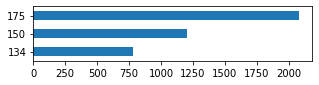

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
134    1159
150    1777
175    2975
Name: PACK_SIZE, dtype: int64


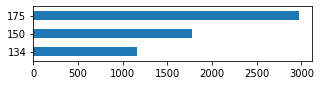

========== MIDAGE SINGLES/COUPLES - Budget ==========
134     449
150     771
175    1277
Name: PACK_SIZE, dtype: int64


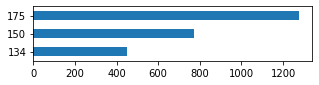

========== NEW FAMILIES - Premium ==========
134    165
150    233
175    376
Name: PACK_SIZE, dtype: int64


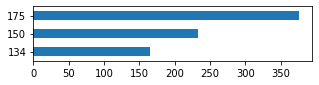

========== NEW FAMILIES - Mainstream ==========
134    224
150    374
175    589
Name: PACK_SIZE, dtype: int64


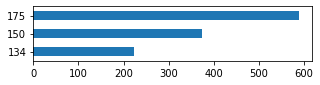

========== NEW FAMILIES - Budget ==========
134    309
150    440
175    777
Name: PACK_SIZE, dtype: int64


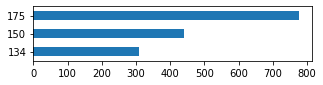

========== OLDER FAMILIES - Premium ==========
134    1014
150    1673
175    2816
Name: PACK_SIZE, dtype: int64


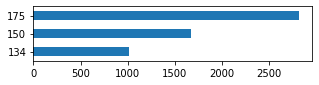

========== OLDER FAMILIES - Mainstream ==========
134    1234
150    2189
175    3588
Name: PACK_SIZE, dtype: int64


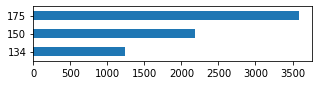

========== OLDER FAMILIES - Budget ==========
134    1996
150    3588
175    5808
Name: PACK_SIZE, dtype: int64


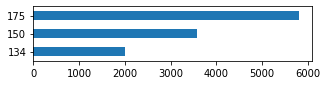

========== RETIREES - Premium ==========
134    1331
150    1943
175    3306
Name: PACK_SIZE, dtype: int64


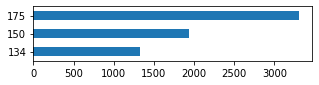

========== RETIREES - Mainstream ==========
134    2103
150    3290
175    5295
Name: PACK_SIZE, dtype: int64


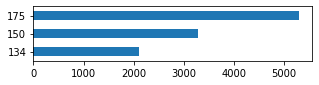

========== RETIREES - Budget ==========
134    1517
150    2319
175    3847
Name: PACK_SIZE, dtype: int64


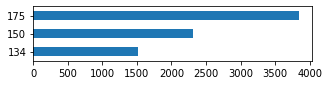

In [62]:


for stage in customerData["LIFESTAGE"].unique():
    for premium in customerData["PREMIUM_CUSTOMER"].unique():
        print('==========',stage, '-', premium,'==========')
        summary = customerData[(customerData["LIFESTAGE"] == stage) & (customerData["PREMIUM_CUSTOMER"] == premium)]["PACK_SIZE"].value_counts().head(3).sort_index()
        print(summary)
        plt.figure()
        summary.plot.barh(figsize=(5,1))
        plt.show()

Almost every segment prefer the 175g pack size chips, followed by the 150g size.

# Conclusion of Analysis 

Top 3 total sales contributor segment are

    Older families (Budget) 
    Young Singles/Couples (Mainstream) 
    Retirees (Mainstream) 

Despite Older Families not having the highest population, they have the highest frequency of purchase, which contributes to their high total sales.
We found that (Mainstream, YOUNG SINGLES/COUPLES) and (Mainstream, RETIREES) are mainly due to the fact that there are more customers in these segments

Chips brand Kettle is dominating every segment as the most purchased brand.
Observing the 2nd most purchased brand, "Young and Midage Singles/Couples" is the only segment with a different preference (Doritos) as compared to others' (Smiths).

Most frequent chip size purchased is 175gr followed by the 150gr chip size for all segments.

# Future Steps

Older Families:
 -   Focus on the Budget segment.
 -   With high frequency of purchase, we can give promotions that encourages more frequency of purchase.

Young Singles/Couples:

   - Focus on the Mainstream segment.
   - This segment is the only segment that had Doritos as their 2nd most purchased brand (after Kettle). To specifically target this segment it might be a good idea to collaborate with Doritos merchant to do some branding promotion catered to "Young 
   - Their strength is their high population. We can spend more effort on making sure our promotions reach them, and it reaches them frequently.


Retirees:
   - Focus on the Mainstream segment.
   - Strength: Population quantity. Again, since their population quantity is the contributor to the high total sales, we should spend more effort on making sure our promotions reaches as many of them as possible and frequent.


All segments has Kettle as the most frequently purchased brand, and preferred packet size of 175g followed by 150g. When promoting chips in general to all segments it is good to take advantage of these two points.
